In [3]:
!unzip archive_2.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

### STEP 1: IMPORTING LIBRARIES:

In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


### STEP 2: SETTING UP PATHS AND DIRECTORIES:


In [25]:
# Set the path to the dataset
dataset_path = "/content"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "/content/Training")
test_dir = os.path.join(dataset_path, "/content/Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]


### STEP 3: LOADING AND PREPROCESSING THE DATASET:

1. The code reads the images from each category in the training directory, counts the number of images in each category, and creates a Pandas DataFrame (***train_df***) to store the image filenames, corresponding categories, and counts.

2. A bar plot is generated to visualize the distribution of tumor types in the training dataset.


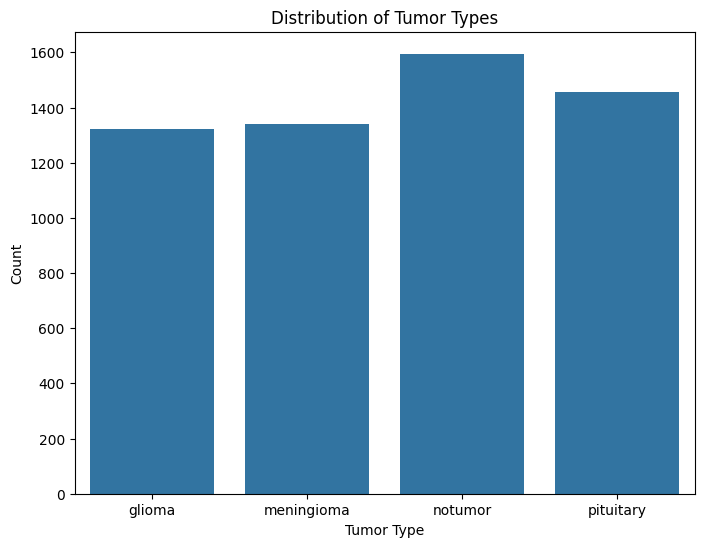

In [26]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


### STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES:

Here, the code displays sample images for each tumor type using a grid of subplots.


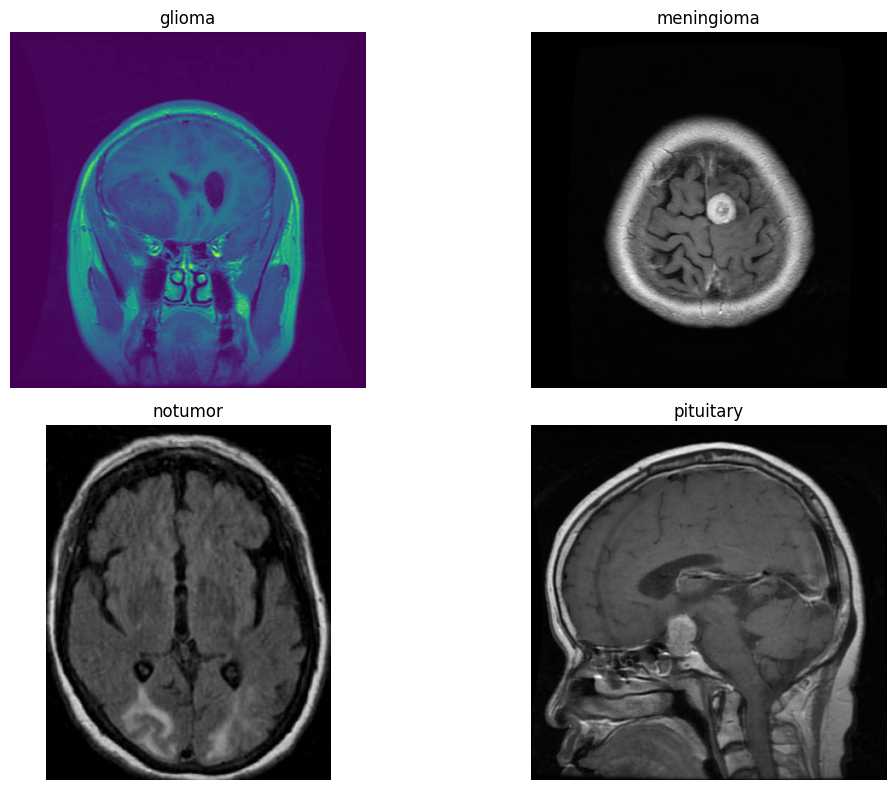

In [27]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### STEP 5: SETTING UP THE IMAGE_SIZE, BATCH_SIZE AND EPOCHS FOR THE MODEL:

The ***image_size*** variable defines the desired size for the input images in the CNN. The ***batch_size*** specifies the number of images to be processed in each training batch, and ***epochs*** determines the number of times the entire training dataset is iterated during training.


In [28]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

### STEP 6: DATA AUGMENTATION AND PREPROCESSING:

In [29]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


**DATA AUGMENTATION** is performed using ***ImageDataGenerator*** class from Keras. It applies various transformations to the training imags to artificially increase the size of the dataset and improve the generalization. The aumentation paramters include rescaling the pixel values, rotation, shifting, shearing, zooming and flipping. The ***train_generator*** is created using the augmented data, and the ***test_generator*** is created with only pixel rescaling for the test dataset.

### STEP 7: BUILDING THE MODEL ARTITECHURE

In [30]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. The model architecture is defined using a sequential model (**Sequential class**). It consists of a series of convolutional (**Conv2D**) and max pooling (**MaxPooling2D**) layers, followed by a **flattening layer**, two fully connected (**Dense**) layers, and a **dropout layer for regularization**.
2. The activation function used for the convolutional layers is **ReLU**, except for the last dense layer, where **softmax activation** is used to output class probabilities.
3. The model is compiled with the **Adam optimizer**, which is an adaptive learning rate optimization algorithm. The loss function used is **categorical cross-entropy**, suitable for multi-class classification problems with **one-hot encoded labels**.
4. The accuracy metric is also specified to monitor the model's performance during training.

In [31]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 48s 244ms/step - accuracy: 0.4766 - loss: 1.1275 - val_accuracy: 0.5148 - val_loss: 1.5629
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7500 - loss: 0.7917

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7500 - loss: 0.7917 - val_accuracy: 0.3548 - val_loss: 1.2863
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - accuracy: 0.7023 - loss: 0.7392 - val_accuracy: 0.5047 - val_loss: 1.4580
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.7500 - loss: 0.7185 - val_accuracy: 0.9032 - val_loss: 0.4184
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 83s 234ms/step - accuracy: 0.7491 - loss: 0.6467 - val_accuracy: 0.6961 - val_loss: 0.7649
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6562 - loss: 0.8453 - val_accuracy: 0.6452 - val_loss: 0.8157
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.7709 - loss: 0.5926 - val_accuracy: 0.7156 - val_loss: 0.7722
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.8438 - loss: 0.3407 - val_accuracy: 0.8065 - val_loss: 0.5924
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 223ms/step - accuracy: 0.7956 - loss: 0.5324 - val_accu

The model is trained using the **fit** method. The ***train_generator*** provides the **training data**, and the ***test_generator*** provides the **validation data**. The ***steps_per_epoch*** and ***validation_steps*** are set to ensure that the entire training and validation datasets are processed in one epoch. The training progress and performance metrics are stored in the history object.

### STEP 8: VISUALIZATION THROUGH GRAPH

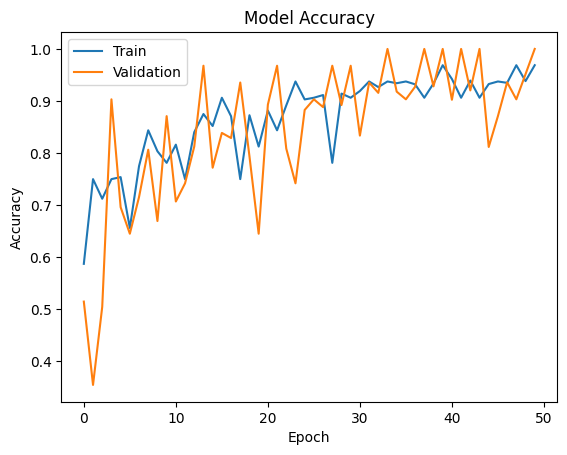

In [32]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

This code plots the training and validation accuracy over epochs using the data stored in history. It helps visualize the model's learning progress and check for overfitting or underfitting.

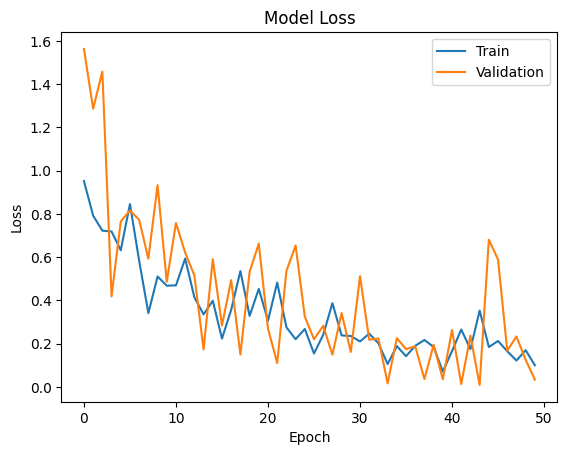

In [33]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

This code plots the training and validation loss over epochs using the data stored in **history**. It helps visualize how the model's loss decreases over time, indicating improved performance.



### STEP 9: EVALUATION

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9211 - loss: 0.1924
Test Loss: 0.1352086067199707
Test Accuracy: 0.948437511920929


1. In the above evaluation ***model.evaluate*** (***test_generator, steps=test_generator.samples // batch_size***) evaluates the trained model on the **test dataset**. It calculates the loss and accuracy of the model's predictions on the test data.

2. The ***loss*** value represents the average loss (error) of the model's predictions compared to the ground truth labels in the test dataset. A lower loss value indicates that the model's predictions are closer to the actual labels, indicating better performance.

3. The ***accuracy*** value represents the proportion of correctly classified samples in the test dataset. It is calculated by dividing the number of correctly predicted samples by the total number of samples in the dataset. A higher accuracy value indicates that the model has made more correct predictions.

4. In the given example, the **test loss** is **0.1352**, which means that, on average, the model's predictions deviate by a small margin from the true labels in the test dataset. The **test accuracy is 0.9484**, indicating that the model has achieved an **accuracy** of approximately **94.84% on the test data**, correctly classifying the tumor types in the majority of the cases.

5. **These evaluation metrics provide insights into the model's performance on unseen data and help assess its generalization capabilities.**

### STEP 10: CONFUSION MATRIX AND EXPLANATION:

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step


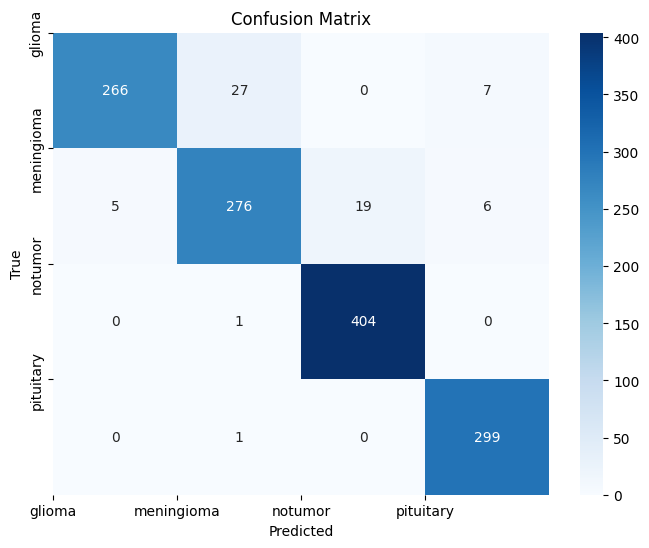

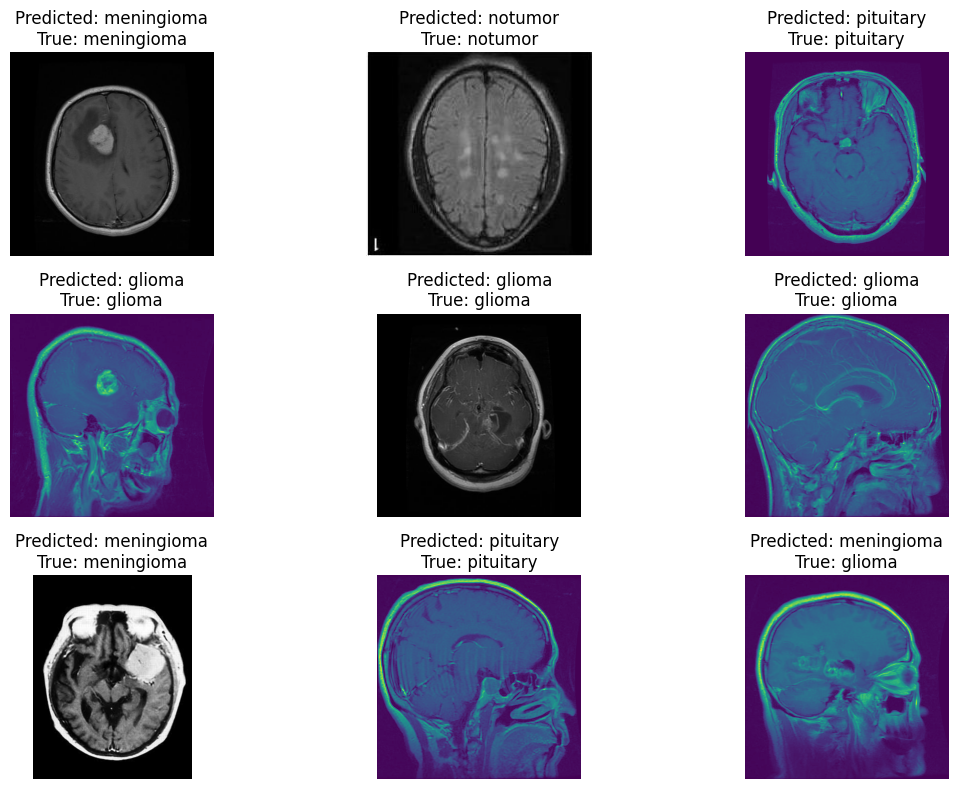

In [38]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


1. The model is used to make predictions on the test dataset using the ***predict*** method. The predictions are stored in the **predictions** variable. The predicted categories are obtained by taking the i*ndices of the maximum values along the rows **(np.argmax(predictions, axis=1))***. The true categories are extracted from the ***test_generator***.

2. A **confusion matrix** is created using TensorFlow's ***tf.math.confusion_matrix*** function. It compares the true and predicted categories and provides a count of correct and incorrect predictions for each class.

3. The confusion matrix is visualized as a heatmap using the ***sns.heatmap*** function from the Seaborn library. It helps visualize the performance of the model in classifying different tumor types.

4. Random sample images, their corresponding predictions, and true labels are selected for visualization. The ***test_images*** variable stores the filenames of test images. Random indices are chosen using ***np.random.choice***, and the corresponding images, predictions, and true labels are extracted.

5. A **grid of subplots** is created to display the sample images along with their predicted and true labels.

Class: glioma
Precision: 0.981549815498155
Recall: 0.8866666666666667
F1-Score: 0.9316987740805605

Class: meningioma
Precision: 0.9049180327868852
Recall: 0.9019607843137255
F1-Score: 0.9034369885433716

Class: notumor
Precision: 0.9550827423167849
Recall: 0.9975308641975309
F1-Score: 0.9758454106280193

Class: pituitary
Precision: 0.9583333333333334
Recall: 0.9966666666666667
F1-Score: 0.977124183006536



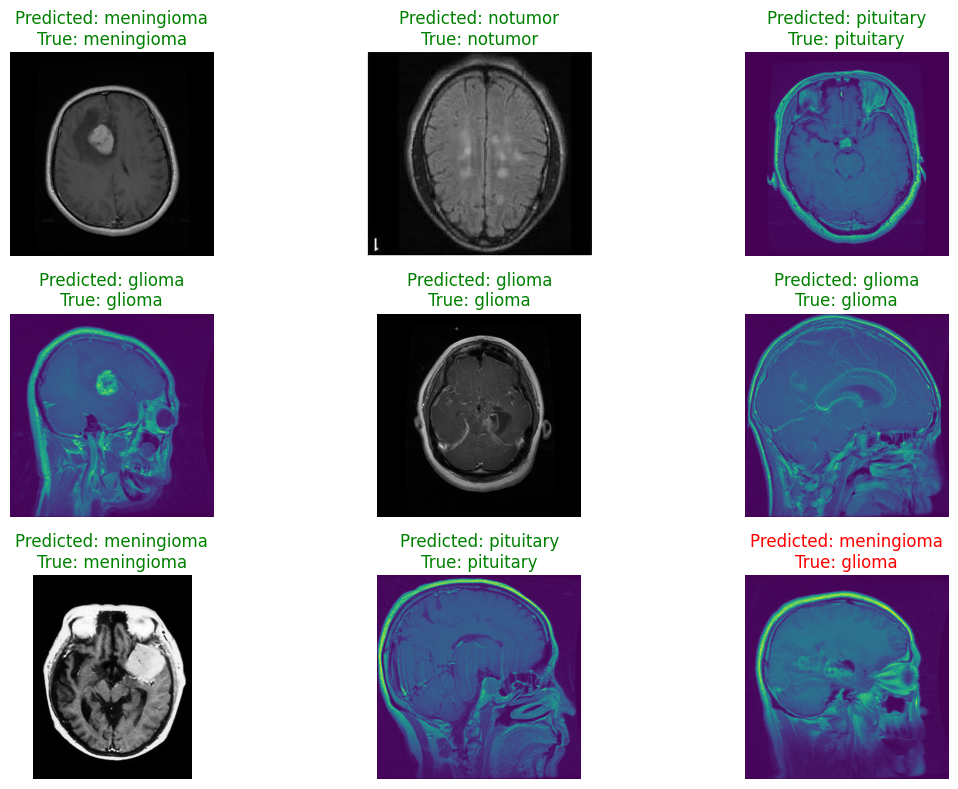

In [39]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

**Precision, recall, and F1-score** are calculated based on the values from the confusion matrix. **Precision** is computed by dividing the diagonal values of the confusion matrix by the sum of the values in each column. **Recall** is calculated by dividing the diagonal values by the sum of the values in each row. **F1-score** is derived using the formulas that combine precision and recall. This loop prints the precision, recall, and F1-score for each class.

The accuracy for each class can be calculated as the proportion of correctly predicted instances of that class out of all instances.
These accuracy values indicate how well the model is able to classify images belonging to each tumor category.

In [41]:
# Save the trained model
model.save("brain_tumor_detection_model.keras")


Finally, the trained model is saved to a file named "***brain_tumor_detection_model.keras***" for future use or deployment.

Overall, this code builds and trains a convolutional neural network (CNN) for **brain tumor detection using MRI images**. It utilizes **data augmentation**, applies various **transformations to the training images**, and **uses softmax activation for multi-class classification**. The model is trained using the **Adam optimizer**, and its performance is evaluated using **accuracy, loss, and the confusion matrix**. Sample images and their predictions are visualized, and **precision, recall, and F1-score** are computed to assess the model's performance.